In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

import acquire as a
import prepare as p

In [2]:
df = a.get_titanic_data()
df_train, validate, test = p.split_titanic_data(df)
df_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
838,1,3,32.0,0,0,56.4958,1,1,0,1
281,0,3,28.0,0,0,7.8542,1,1,0,1
865,1,2,42.0,0,0,13.0000,1,0,0,1
574,0,3,16.0,0,0,8.0500,1,1,0,1
880,1,2,25.0,0,1,26.0000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
562,0,2,28.0,0,0,13.5000,1,1,0,1
251,0,3,29.0,1,1,10.4625,0,0,0,1
293,0,3,24.0,0,0,8.8500,1,0,0,1
512,1,1,36.0,0,0,26.2875,1,1,0,1


In [3]:
df_train.survived.value_counts()

0    237
1    162
Name: survived, dtype: int64

##### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. 

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [4]:
# get the most common value in survived
baseline_prediction = df_train.survived.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(df_train.shape[0])])
baseline_model

0      0
1      0
2      0
3      0
4      0
      ..
394    0
395    0
396    0
397    0
398    0
Length: 399, dtype: int64

In [5]:
pd.DataFrame(metrics.classification_report(df_train.survived, baseline_model, labels = [0, 1], output_dict=True)).T

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.593985,1.000000,0.745283,237.000000
1,0.000000,0.000000,0.000000,162.000000
accuracy,0.593985,0.593985,0.593985,0.593985
macro avg,0.296992,0.500000,0.372642,399.000000
weighted avg,0.352818,0.593985,0.442687,399.000000


baseline accuracy is ~[0.59, 0.62]

2.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
# split the train data into X and y sets

X_train = df_train.drop(columns = ['survived'])
y_train = df_train.survived

In [7]:
#make the model object
clf = DecisionTreeClassifier(max_depth = 3, random_state=123)

In [8]:
#train the model

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(362.7, 618.3449999999999, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(181.35, 441.67499999999995, 'pclass <= 2.5\ngini = 0.357\nsamples = 146\nvalue = [34, 112]\nclass = survived'),
 Text(90.675, 265.005, 'age <= 47.5\ngini = 0.083\nsamples = 92\nvalue = [4, 88]\nclass = survived'),
 Text(45.3375, 88.33500000000004, 'gini = 0.048\nsamples = 81\nvalue = [2, 79]\nclass = survived'),
 Text(136.0125, 88.33500000000004, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = survived'),
 Text(272.025, 265.005, 'fare <= 24.962\ngini = 0.494\nsamples = 54\nvalue = [30, 24]\nclass = perished'),
 Text(226.6875, 88.33500000000004, 'gini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = survived'),
 Text(317.3625, 88.33500000000004, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = perished'),
 Text(544.05, 441.67499999999995, 'age <= 9.5\ngini = 0.317\nsamples = 253\nvalue = [203, 50]\nclass = perished'),
 Text(453.375, 265.005, 'sibsp <= 2.

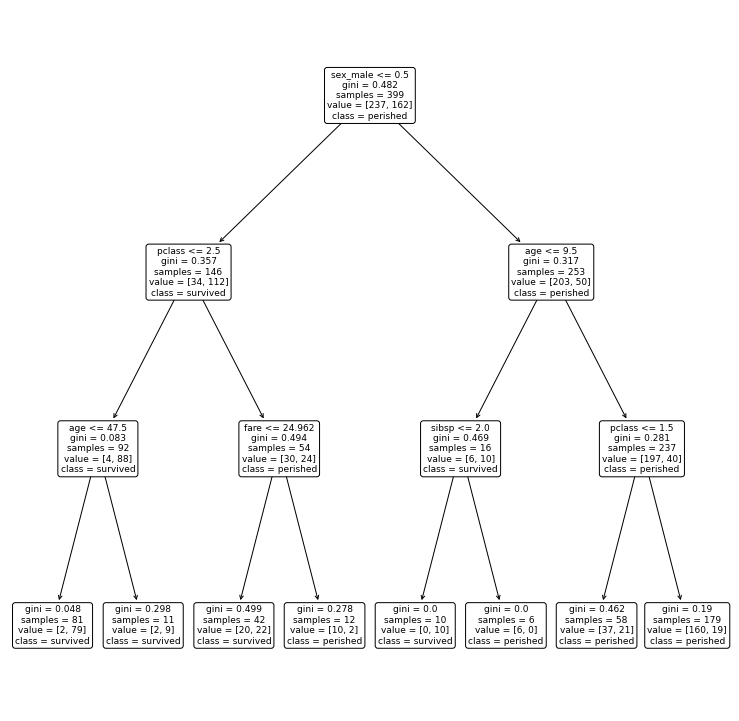

In [9]:
plt.figure(figsize=(13, 13))
plot_tree(clf, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [10]:
# make predictions using the training data
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 1, 0, 1])

In [11]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob[0:5]

array([[0.89385475, 0.10614525],
       [0.89385475, 0.10614525],
       [0.02469136, 0.97530864],
       [0.89385475, 0.10614525],
       [0.02469136, 0.97530864]])

3. 


Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [12]:
f"Accuracy on train data is {clf.score(X_train, y_train)}"

'Accuracy on train data is 0.8345864661654135'

In [13]:
#make a confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,213,24
1,42,120


In [14]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       237
           1       0.83      0.74      0.78       162

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.83       399
weighted avg       0.83      0.83      0.83       399



4.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [15]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(213, 24, 42, 120)

In [16]:
#true positive rate

tp/(tp+fn)

0.7407407407407407

In [17]:
# false positive rate

fp/(fp+tp)

0.16666666666666666

In [18]:
# true negative rate

tn/(tn+fp)

0.8987341772151899

In [19]:
# false negative rate

fn/(fn+tp)

0.25925925925925924

In [20]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8345864661654135

In [21]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       237
           1       0.83      0.74      0.78       162

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.83       399
weighted avg       0.83      0.83      0.83       399



5.

Run through steps 2-4 using a different max_depth value.

[Text(362.7, 588.9, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(181.35, 353.34, 'pclass <= 2.5\ngini = 0.357\nsamples = 146\nvalue = [34, 112]\nclass = survived'),
 Text(90.675, 117.77999999999997, 'gini = 0.083\nsamples = 92\nvalue = [4, 88]\nclass = survived'),
 Text(272.025, 117.77999999999997, 'gini = 0.494\nsamples = 54\nvalue = [30, 24]\nclass = perished'),
 Text(544.05, 353.34, 'age <= 9.5\ngini = 0.317\nsamples = 253\nvalue = [203, 50]\nclass = perished'),
 Text(453.375, 117.77999999999997, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = survived'),
 Text(634.725, 117.77999999999997, 'gini = 0.281\nsamples = 237\nvalue = [197, 40]\nclass = perished')]

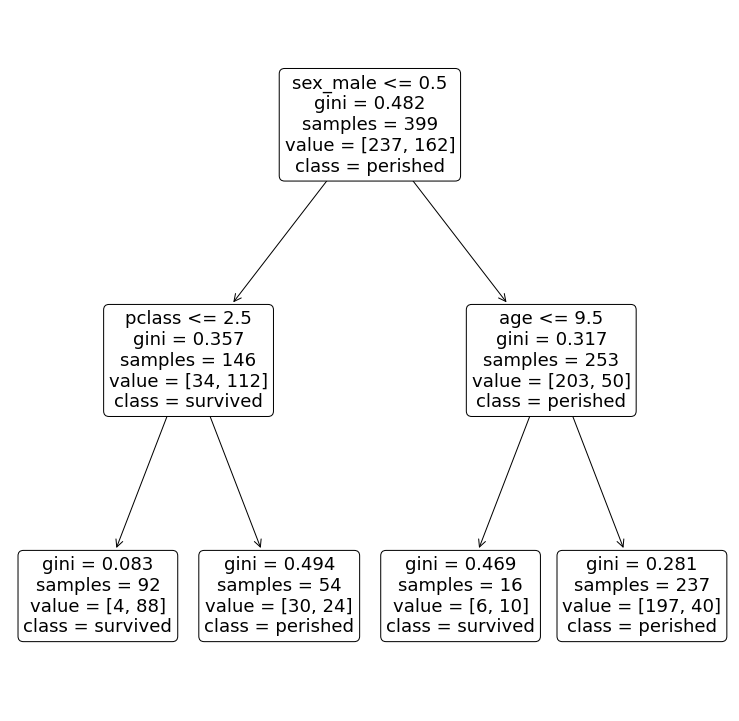

In [22]:
clf2 = DecisionTreeClassifier(max_depth = 2, random_state=123)
clf2 = clf2.fit(X_train, y_train)
plt.figure(figsize=(13, 13))
plot_tree(clf2, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [23]:
# make predictions using the training data
y_pred2 = clf2.predict(X_train)
y_pred2[0:5]

array([0, 0, 1, 0, 1])

In [24]:
y_pred_prob2 = clf.predict_proba(X_train)
y_pred_prob2[0:5]

array([[0.89385475, 0.10614525],
       [0.89385475, 0.10614525],
       [0.02469136, 0.97530864],
       [0.89385475, 0.10614525],
       [0.02469136, 0.97530864]])

In [25]:
f"Accuracy on train data is {clf2.score(X_train, y_train)}"

'Accuracy on train data is 0.8145363408521303'

In [26]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred2))

,0,1
0,227,10
1,64,98


In [27]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       237
           1       0.91      0.60      0.73       162

    accuracy                           0.81       399
   macro avg       0.84      0.78      0.79       399
weighted avg       0.83      0.81      0.81       399



In [28]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred2).ravel()
tn, fp, fn, tp

(227, 10, 64, 98)

In [29]:
#true positive rate

tp/(tp+fn)

0.6049382716049383

In [30]:
# false positive rate

fp/(fp+tp)

0.09259259259259259

In [31]:
# true negative rate

tn/(tn+fp)

0.9578059071729957

In [32]:
# false negative rate

fn/(fn+tp)

0.3950617283950617

In [33]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8145363408521303

In [34]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       237
           1       0.91      0.60      0.73       162

    accuracy                           0.81       399
   macro avg       0.84      0.78      0.79       399
weighted avg       0.83      0.81      0.81       399



6.

Which model performs better on your in-sample data?


- Since there is not a high cost to false positive/negative, we can use the f1-score to evaluate the models.  THis means that the first model with a depth of 3 is better at the in-sample data

7.

Which model performs best on your out-of-sample data, the validate set?

In [35]:
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

- model 1

In [36]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.79


In [37]:
y_pred = clf.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84        85
           1       0.80      0.64      0.71        58

    accuracy                           0.79       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.79      0.79       143



- model 2

In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.73


In [39]:
y_pred2 = clf2.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        85
           1       0.81      0.45      0.58        58

    accuracy                           0.73       143
   macro avg       0.76      0.69      0.69       143
weighted avg       0.75      0.73      0.71       143



Both seem pretty similar. model2 seems like a more precise model when predicting survival, so it would be preferred.  In addition, it's overall f1-score is higher, so it might be an overall good middle ground.

### telco data set

In [40]:
df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

In [41]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 2446 to 2149
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  t

make a baseline model

In [42]:
(telco_train.churn == 'Yes').mean()

0.2656845313690627

In [43]:
#most of the customers do not churn. baseline model is no one churns
baseline_prediction = telco_train.churn_Yes.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(telco_train.shape[0])])
baseline_model

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

baseline prediction is a customer does not churn

In [44]:
pd.DataFrame(metrics.classification_report(telco_train.churn_Yes, baseline_model, labels = [0, 1], output_dict=True)).T


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.734315,1.000000,0.846807,2891.000000
1,0.000000,0.000000,0.000000,1046.000000
accuracy,0.734315,0.734315,0.734315,0.734315
macro avg,0.367158,0.500000,0.423404,3937.000000
weighted avg,0.539219,0.734315,0.621824,3937.000000


baseline accuracy is about 0.73

make a model and fit it to the data


In [45]:
X_telco_train = telco_train.select_dtypes(exclude = 'object').drop(columns = 'churn_Yes')
y_telco_train = telco_train.churn_Yes

clf_telco = DecisionTreeClassifier(max_depth = 2, random_state = 321)

cfl_telco = clf_telco.fit(X_telco_train, y_telco_train)

[Text(418.5, 679.5, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(209.25, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.497\nsamples = 1351\nvalue = [726, 625]\nclass = no churn'),
 Text(104.625, 135.89999999999998, 'gini = 0.416\nsamples = 778\nvalue = [548, 230]\nclass = no churn'),
 Text(313.875, 135.89999999999998, 'gini = 0.428\nsamples = 573\nvalue = [178, 395]\nclass = churn'),
 Text(627.75, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.273\nsamples = 2586\nvalue = [2165, 421]\nclass = no churn'),
 Text(523.125, 135.89999999999998, 'gini = 0.13\nsamples = 1442\nvalue = [1341, 101]\nclass = no churn'),
 Text(732.375, 135.89999999999998, 'gini = 0.403\nsamples = 1144\nvalue = [824, 320]\nclass = no churn')]

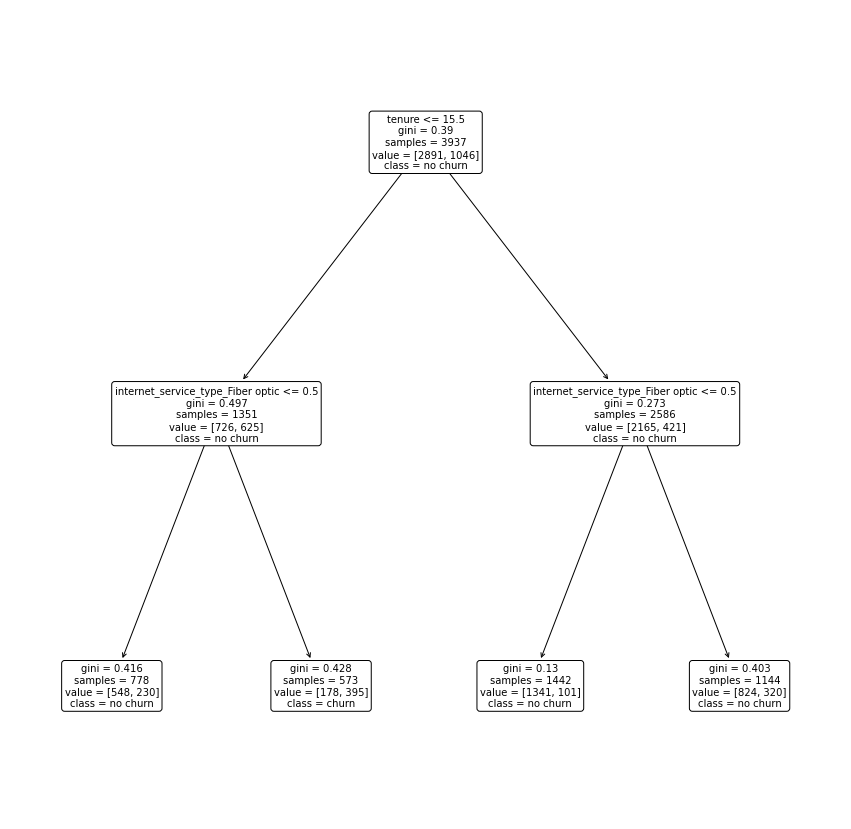

In [46]:
plt.figure(figsize=(15, 15))
plot_tree(clf_telco, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [47]:
#predict using the training set
# make predictions using the training data
y_pred_telco = clf_telco.predict(X_telco_train)
y_pred_telco[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [48]:
y_pred_prob_telco = clf_telco.predict_proba(X_telco_train)
y_pred_prob_telco[0:5]

array([[0.92995839, 0.07004161],
       [0.72027972, 0.27972028],
       [0.92995839, 0.07004161],
       [0.92995839, 0.07004161],
       [0.92995839, 0.07004161]])

In [49]:
#confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco))

,0,1
0,2713,178
1,651,395


In [50]:
y_telco_train.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [51]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.3776290630975143
tn_rate = 0.9384296091317883
fp_rate = 0.3106457242582897
fn_rate = 0.19351961950059454
acc = 0.7894335788671577


In [52]:
print(metrics.classification_report(y_telco_train, y_pred_telco))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.69      0.38      0.49      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [53]:
f"Accuracy of Decision Tree Classifier on train set: {clf_telco.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Classifier on train set: 0.7894335788671577'

make a second model with more depth.  maybe this won't overfit because there are so many variables

[Text(558.0, 996.6, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(279.0, 815.4000000000001, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.497\nsamples = 1351\nvalue = [726, 625]\nclass = no churn'),
 Text(139.5, 634.2, 'tenure <= 3.5\ngini = 0.416\nsamples = 778\nvalue = [548, 230]\nclass = no churn'),
 Text(69.75, 453.0, 'online_backup_No internet service <= 0.5\ngini = 0.494\nsamples = 336\nvalue = [186, 150]\nclass = no churn'),
 Text(34.875, 271.79999999999995, 'monthly_charges <= 60.5\ngini = 0.494\nsamples = 193\nvalue = [86, 107]\nclass = churn'),
 Text(17.4375, 90.59999999999991, 'gini = 0.487\nsamples = 179\nvalue = [75, 104]\nclass = churn'),
 Text(52.3125, 90.59999999999991, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]\nclass = no churn'),
 Text(104.625, 271.79999999999995, 'total_charges <= 38.975\ngini = 0.421\nsamples = 143\nvalue = [100, 43]\nclass = no churn'),
 Text(87.1875, 90.59999999999991, 'gini = 0.465\nsamples

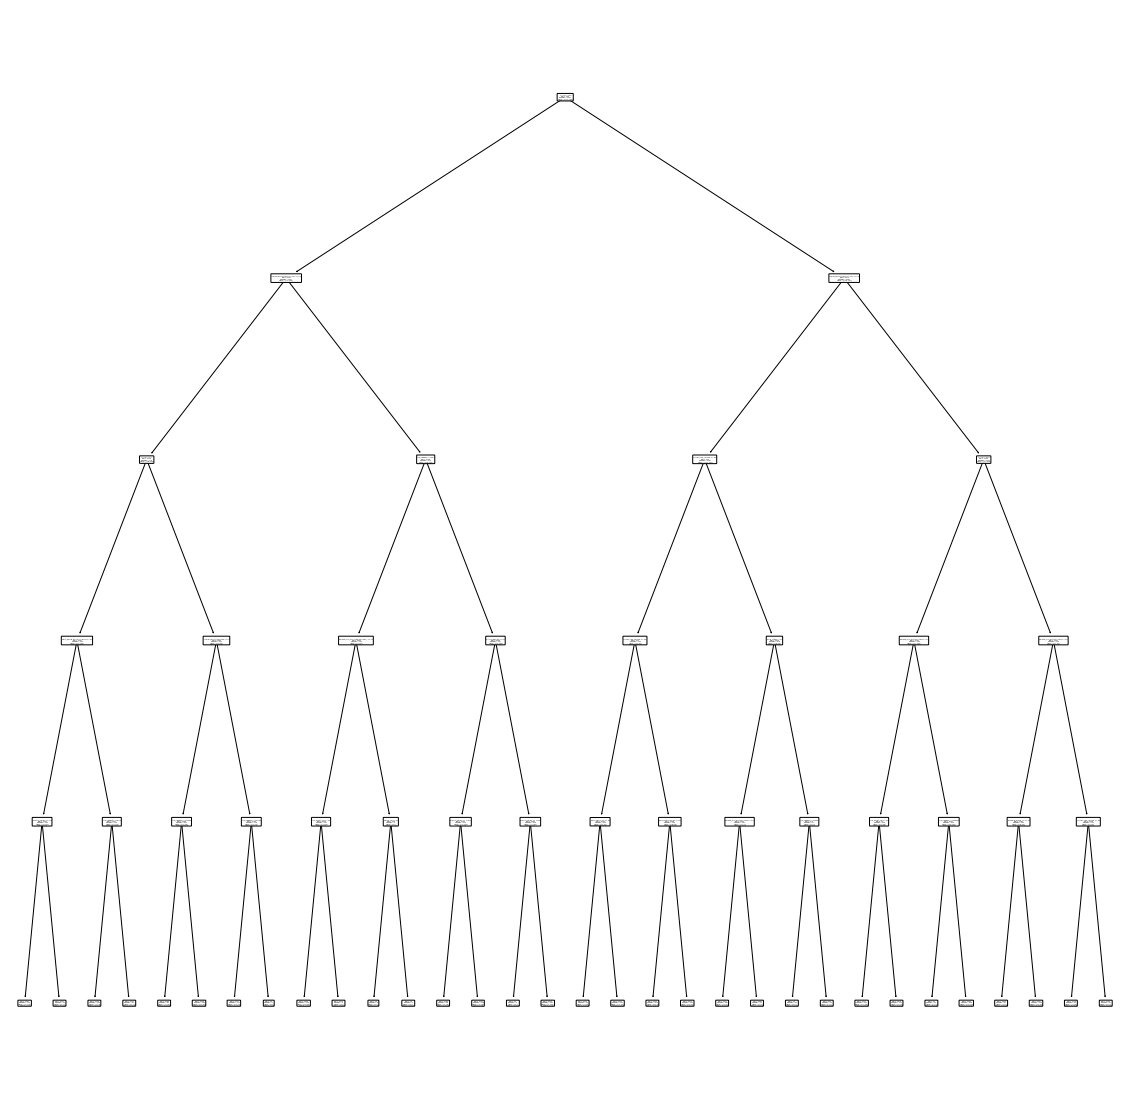

In [54]:
clf_telco2 = DecisionTreeClassifier(max_depth = 5, random_state=321)

clf_telco2 = clf_telco2.fit(X_telco_train, y_telco_train)

plt.figure(figsize=(20,20))
plot_tree(clf_telco2, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [55]:
#now evaluate the model over the train set
y_pred_telco2 = clf_telco2.predict(X_telco_train)
pd.Series(y_pred_telco2)

0       0
1       0
2       0
3       0
4       0
       ..
3932    1
3933    1
3934    0
3935    0
3936    0
Length: 3937, dtype: uint8

In [56]:
y_pred_prob_telco2 = clf_telco2.predict_proba(X_telco_train)
y_pred_prob_telco2[0:5]

array([[0.96727273, 0.03272727],
       [0.70212766, 0.29787234],
       [0.99148211, 0.00851789],
       [0.85903084, 0.14096916],
       [0.96727273, 0.03272727]])

In [57]:
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco2))

,0,1
0,2696,195
1,585,461


In [58]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco2).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.44072657743785854
tn_rate = 0.9325492909028018
fp_rate = 0.2972560975609756
fn_rate = 0.17829929899420907
acc = 0.8018796037592075


In [59]:
f"Accuracy of Decision Tree Model 2: {clf_telco2.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Model 2: 0.8018796037592075'

In [60]:
print(metrics.classification_report(y_telco_train, y_pred_telco2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.70      0.44      0.54      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



now make predictions with validate data

In [61]:
#make a validate set

X_telco_val = t_validate.select_dtypes(exclude= 'object').drop(columns='churn_Yes')
y_telco_val = t_validate.churn_Yes

In [62]:
#make predictions and spit out the accuracy and classification report

models = [clf_telco, clf_telco2]
for i, model in enumerate(models):
    print("===========================================================")
    print(f"model {i+1}")
    print(f"Accuracy of decision tree {i+1} on validate: {model.score(X_telco_val, y_telco_val)}")
    y_pred = model.predict(X_telco_val)
    print(metrics.classification_report(y_telco_val, y_pred))
    

model 1
Accuracy of decision tree 1 on validate: 0.7917555081734187
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1033
           1       0.69      0.39      0.50       374

    accuracy                           0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407

model 2
Accuracy of decision tree 2 on validate: 0.7945984363894811
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



We probably want to optimize recall on using churn as the positive case (since churn is so costly, it makes sense to try to keep as many customers as possible).  In this, the second model is better.

## random forest exs

with titanic data set

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
t_train, t_validate, t_test = p.split_titanic_data(a.get_titanic_data())
t_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
461,0,3,34.0,0,0,8.0500,1,1,0,1
226,1,2,19.0,0,0,10.5000,1,1,0,1
208,1,3,16.0,0,0,7.7500,1,0,1,0
856,1,1,45.0,1,1,164.8667,0,0,0,1
441,0,3,20.0,0,0,9.5000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
44,1,3,19.0,0,0,7.8792,1,0,1,0
780,1,3,13.0,0,0,7.2292,1,0,0,0
618,1,2,4.0,2,1,39.0000,0,0,0,1
541,0,3,9.0,4,2,31.2750,0,0,0,1


1.


Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [65]:
# seperate out target variable
X_titanic_train = t_train.drop(columns=['survived'])
y_titanic_train = t_train.survived

X_validate = t_validate.drop(columns=['survived'])
y_validate = t_validate.survived

X_test = t_test.drop(columns=['survived'])
y_test = t_test.survived

In [66]:
baseline = y_titanic_train.mode()
baseline

0    0
dtype: int64

In [67]:
# train the model
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth=10, random_state=135)
rf = rf.fit(X_titanic_train, y_titanic_train)
rf

RandomForestClassifier(max_depth=10, random_state=135)

In [68]:
# make predictions
y_pred = rf.predict(X_titanic_train)
y_pred[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [69]:
y_pred_proba = rf.predict_proba(X_titanic_train)
y_pred_proba[0:10]

array([[0.82342829, 0.17657171],
       [0.53521547, 0.46478453],
       [0.11817055, 0.88182945],
       [0.073125  , 0.926875  ],
       [0.97027434, 0.02972566],
       [0.86143144, 0.13856856],
       [0.94912323, 0.05087677],
       [0.89527778, 0.10472222],
       [0.97486024, 0.02513976],
       [0.94353052, 0.05646948]])

2.

Evaluate your results using the model score, confusion matrix, and classification report.

In [70]:
print(f"accuracy of random forest model: {rf.score(X_titanic_train, y_titanic_train)}")

accuracy of random forest model: 0.974937343358396


In [71]:
# confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_titanic_train, y_pred))

,0,1
0,236,1
1,9,153


In [72]:
#classification report
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.963265,0.995781,0.979253,237.000000
1,0.993506,0.944444,0.968354,162.000000
accuracy,0.974937,0.974937,0.974937,0.974937
macro avg,0.978386,0.970113,0.973804,399.000000
weighted avg,0.975544,0.974937,0.974828,399.000000


3.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [73]:
tn, fp, fn, tp = metrics.confusion_matrix(y_titanic_train, y_pred).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.9444444444444444
tn_rate = 0.9957805907172996
fp_rate = 0.006493506493506494
fn_rate = 0.036734693877551024
acc = 0.974937343358396


In [74]:
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T[['f1-score']]

,f1-score
0,0.979253
1,0.968354
accuracy,0.974937
macro avg,0.973804
weighted avg,0.974828


In [75]:
pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T[['support']]

,support
0,237.000000
1,162.000000
accuracy,0.974937
macro avg,399.000000
weighted avg,399.000000


4.

Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

In [76]:
depths = list(range(1, 11))
leafs = list(reversed(depths))
values = {'depths':depths, 'leafs':leafs}
for i in range(len(depths)):
    print(f"=====model{i}=====")
    print(f"min_samples_leaf = {values['leafs'][i]} : max_depth = {values['depths'][i]}")
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_titanic_train)
    tn, fp, fn, tp = metrics.confusion_matrix(y_titanic_train, y_pred).ravel()
    tp_rate = tp/(fn+tp)
    tn_rate = tn/(fp+tn)
    fp_rate = fp/(fp+tp)
    fn_rate = fn/(fn+tn)
    accuracy = (tp+tn)/(tp+tn+fn+fp)
    print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")
    print(f"accuracy of random forest model: {rf.score(X_titanic_train, y_titanic_train)}")
    print(pd.DataFrame(metrics.classification_report(y_titanic_train, y_pred, output_dict=True)).T)
    print()

=====model0=====
min_samples_leaf = 10 : max_depth = 1
tp_rate = 0.6172839506172839
tn_rate = 0.8734177215189873
fp_rate = 0.23076923076923078
fn_rate = 0.23048327137546468
acc = 0.7694235588972431
accuracy of random forest model: 0.7694235588972431
              precision    recall  f1-score     support
0              0.769517  0.873418  0.818182  237.000000
1              0.769231  0.617284  0.684932  162.000000
accuracy       0.769424  0.769424  0.769424    0.769424
macro avg      0.769374  0.745351  0.751557  399.000000
weighted avg   0.769401  0.769424  0.764080  399.000000

=====model1=====
min_samples_leaf = 9 : max_depth = 2
tp_rate = 0.5679012345679012
tn_rate = 0.9620253164556962
fp_rate = 0.0891089108910891
fn_rate = 0.2348993288590604
acc = 0.8020050125313283
accuracy of random forest model: 0.8020050125313283
              precision    recall  f1-score     support
0              0.765101  0.962025  0.852336  237.000000
1              0.910891  0.567901  0.699620  162.00000

In [77]:
metrics.classification_report(y_titanic_train, y_pred, output_dict=True)

{'0': {'precision': 0.963265306122449,
  'recall': 0.9957805907172996,
  'f1-score': 0.9792531120331951,
  'support': 237},
 '1': {'precision': 0.9935064935064936,
  'recall': 0.9444444444444444,
  'f1-score': 0.9683544303797468,
  'support': 162},
 'accuracy': 0.974937343358396,
 'macro avg': {'precision': 0.9783858998144712,
  'recall': 0.970112517580872,
  'f1-score': 0.9738037712064709,
  'support': 399},
 'weighted avg': {'precision': 0.9755436829550687,
  'recall': 0.974937343358396,
  'f1-score': 0.9748280833919454,
  'support': 399}}

5.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [78]:
#assume that survive is the positive case
depths = list(range(1, 11)) + list(range(1, 11))
leafs = list(range(10, 0, -1)) + list(range(1, 11))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_titanic_train)
    metrics_dict = metrics.classification_report(y_titanic_train, y_pred, output_dict=True)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_titanic_train, y_titanic_train),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [79]:
leafs[5]

5

In [80]:
modeltrain_df = pd.DataFrame(outputs)
modeltrain_df

,min_samples_leaf,max_depth,accuracy,precision,recall
0,10,1,0.769424,0.769231,0.617284
1,9,2,0.802005,0.910891,0.567901
2,8,3,0.849624,0.925000,0.685185
3,7,4,0.852130,0.932773,0.685185
4,6,5,0.854637,0.906250,0.716049
5,5,6,0.872180,0.917293,0.753086
6,4,7,0.879699,0.925373,0.765432
7,3,8,0.887218,0.933333,0.777778
8,2,9,0.897243,0.935252,0.802469
9,1,10,0.974937,0.993506,0.944444


After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [81]:
#now evaluate on validate:
#assume that survive is the positive case
depths = list(range(1, 11)) + list(range(1, 11))
leafs = list(range(10, 0, -1)) + list(range(1, 11))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_titanic_train, y_titanic_train)
    y_pred = rf.predict(X_validate)
    metrics_dict = metrics.classification_report(y_validate, y_pred, output_dict=True)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_validate, y_validate),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [82]:
modelvalidate_df = pd.DataFrame(outputs)
modelvalidate_df

,min_samples_leaf,max_depth,accuracy,precision,recall
0,10,1,0.776224,0.782609,0.620690
1,9,2,0.790210,0.868421,0.568966
2,8,3,0.790210,0.833333,0.603448
3,7,4,0.783217,0.829268,0.586207
4,6,5,0.783217,0.829268,0.586207
5,5,6,0.790210,0.850000,0.586207
6,4,7,0.790210,0.850000,0.586207
7,3,8,0.797203,0.837209,0.620690
8,2,9,0.797203,0.837209,0.620690
9,1,10,0.783217,0.800000,0.620690


In [83]:
#consider the difference in accuracy between train and validate for each model
comparemodel_df = modelvalidate_df[['min_samples_leaf', 'max_depth']]
comparemodel_df['validate_acc'] = modelvalidate_df[['accuracy']]
comparemodel_df['train_acc'] = modeltrain_df[['accuracy']]
comparemodel_df['difference'] = comparemodel_df['train_acc'] - comparemodel_df['validate_acc']
comparemodel_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_34048/3307010481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparemodel_df['validate_acc'] = modelvalidate_df[['accuracy']]
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_34048/3307010481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparemodel_df['train_acc'] = modeltrain_df[['accuracy']]


,min_samples_leaf,max_depth,validate_acc,train_acc,difference
0,10,1,0.776224,0.769424,-0.006800
1,9,2,0.790210,0.802005,0.011795
2,8,3,0.790210,0.849624,0.059414
3,7,4,0.783217,0.852130,0.068914
4,6,5,0.783217,0.854637,0.071420
5,5,6,0.790210,0.872180,0.081971
6,4,7,0.790210,0.879699,0.089489
7,3,8,0.797203,0.887218,0.090015
8,2,9,0.797203,0.897243,0.100040
9,1,10,0.783217,0.974937,0.191721


It looks like model 13, with min_samples_leaf = 4 and max_depth = 4, but all beat a baseline of ~0.5.

## make one for telco data


In [84]:
df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 3528 to 1161
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  t

In [85]:
X_telco_train = telco_train.select_dtypes(exclude= 'object').drop(columns=['churn_Yes'])
y_telco_train = telco_train['churn_Yes']

X_telco_val = t_validate.select_dtypes(exclude= 'object').drop(columns=['churn_Yes'])
y_telco_val = t_validate.churn_Yes

In [86]:
#assume that churn is the positive case
#doesn't like max_depth = 1; need to use zero_division=True for classification_report
depths = list(range(2, 6)) + list(range(2, 6))
leafs = list(range(5, 1, -1)) + list(range(2, 6))
values = {'depths':depths, 'leafs':leafs}
outputs = []
for i in range(len(depths)):
    rf = RandomForestClassifier(min_samples_leaf = values['leafs'][i], max_depth=values['depths'][i], random_state=135)
    rf = rf.fit(X_telco_train, y_telco_train)
    y_pred = rf.predict(X_telco_train)
    metrics_dict = metrics.classification_report(y_telco_train, y_pred, output_dict=True, zero_division=False)
    output = {
        'min_samples_leaf':values['leafs'][i],
        'max_depth':values['depths'][i],
        'accuracy':rf.score(X_telco_train, y_telco_train),
        'precision':metrics_dict['1']['precision'],
        'recall':metrics_dict['1']['recall']
    }
    outputs.append(output)

In [87]:
pd.DataFrame(outputs)

,min_samples_leaf,max_depth,accuracy,precision,recall
0,5,2,0.755652,0.862069,0.095602
1,4,3,0.787402,0.720000,0.326960
2,3,4,0.801372,0.712219,0.423518
3,2,5,0.803404,0.707317,0.443595
4,2,2,0.755652,0.862069,0.095602
5,3,3,0.787402,0.720000,0.326960
6,4,4,0.801626,0.712681,0.424474
7,5,5,0.801372,0.702454,0.437859


## KNN algorithm

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
t_train, t_validate, t_test = p.split_titanic_data(a.get_titanic_data())
t_train.sample(5)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
258,1,1,35.0,0,0,512.3292,1,0,0,0
133,1,2,29.0,1,0,26.0000,0,0,0,1
182,0,3,9.0,4,2,31.3875,0,1,0,1
862,1,1,48.0,0,0,25.9292,1,0,0,1
449,1,1,52.0,0,0,30.5000,1,1,0,1


In [90]:
X_train = t_train.drop(columns='survived')
y_train = t_train.survived

1.


Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [91]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [92]:
y_pred = knn.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

2.

Evaluate your results using the model score, confusion matrix, and classification report.

In [93]:
f"Accuracy of model with k = 5 : {knn.score(X_train, y_train)}"

'Accuracy of model with k = 5 : 0.7869674185463659'

In [94]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,204,33
1,52,110


In [95]:
pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.796875,0.860759,0.827586,237.000000
1,0.769231,0.679012,0.721311,162.000000
accuracy,0.786967,0.786967,0.786967,0.786967
macro avg,0.783053,0.769886,0.774449,399.000000
weighted avg,0.785651,0.786967,0.784437,399.000000


3.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [96]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.6790123456790124
tn_rate = 0.8607594936708861
fp_rate = 0.23076923076923078
fn_rate = 0.203125
acc = 0.7869674185463659


In [97]:
class_report = pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict=True)).T
class_report[['precision']]

,precision
0,0.796875
1,0.769231
accuracy,0.786967
macro avg,0.783053
weighted avg,0.785651


In [98]:
class_report[['recall']]

,recall
0,0.860759
1,0.679012
accuracy,0.786967
macro avg,0.769886
weighted avg,0.786967


In [99]:
class_report[['f1-score']]

,f1-score
0,0.827586
1,0.721311
accuracy,0.786967
macro avg,0.774449
weighted avg,0.784437


In [100]:
class_report[['support']]

,support
0,237.000000
1,162.000000
accuracy,0.786967
macro avg,399.000000
weighted avg,399.000000


4.

Run through steps 2-4 setting k to 10

5.

Run through setps 2-4 setting k to 20

In [101]:
metrics.classification_report(y_train, y_pred, output_dict=True)

{'0': {'precision': 0.796875,
  'recall': 0.8607594936708861,
  'f1-score': 0.8275862068965516,
  'support': 237},
 '1': {'precision': 0.7692307692307693,
  'recall': 0.6790123456790124,
  'f1-score': 0.7213114754098361,
  'support': 162},
 'accuracy': 0.7869674185463659,
 'macro avg': {'precision': 0.7830528846153846,
  'recall': 0.7698859196749492,
  'f1-score': 0.7744488411531938,
  'support': 399},
 'weighted avg': {'precision': 0.785651026604974,
  'recall': 0.7869674185463659,
  'f1-score': 0.7844370677966821,
  'support': 399}}

In [102]:
#assume the survival is the positive case
outputs = []
for k in range(2, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    metrics_dict = metrics.classification_report(y_train, y_pred, output_dict=True)
    output = {
        'k':k,
        'accuracy':knn.score(X_train, y_train),
        'recall': metrics_dict['1']['recall'],
        'precision': metrics_dict['1']['precision']
    }
    outputs.append(output)

In [103]:
train_df = pd.DataFrame(outputs)
train_df

,k,accuracy,recall,precision
0,2,0.842105,0.611111,1.000000
1,4,0.779449,0.537037,0.870000
2,6,0.771930,0.567901,0.814159
3,8,0.749373,0.574074,0.750000
4,10,0.739348,0.567901,0.730159
5,12,0.734336,0.567901,0.718750
6,14,0.716792,0.543210,0.692913
7,16,0.734336,0.574074,0.715385
8,18,0.721805,0.549383,0.700787
9,20,0.721805,0.543210,0.704000


6.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The fewer the neighbors the better the accuracy.  A model with 2 neighbors is the most accurate.  This could be because of the larger proportion of categorical data in the data set; only 2/9 are non-categorical.  

7.

Which model performs best on our out-of-sample data from validate?

In [104]:
X_validate = t_validate.drop(columns='survived')
y_validate = t_validate.survived

In [105]:
#assume the survival is the positive case
outputs = []
for k in range(2, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    metrics_dict = metrics.classification_report(y_validate, y_pred, output_dict=True)
    output = {
        'k':k,
        'accuracy':knn.score(X_validate, y_validate),
        'recall': metrics_dict['1']['recall'],
        'precision': metrics_dict['1']['precision']
    }
    outputs.append(output)

In [106]:
val_df = pd.DataFrame(outputs)
val_df

,k,accuracy,recall,precision
0,2,0.692308,0.413793,0.705882
1,4,0.643357,0.379310,0.594595
2,6,0.657343,0.448276,0.604651
3,8,0.671329,0.500000,0.617021
4,10,0.685315,0.517241,0.638298
5,12,0.678322,0.534483,0.620000
6,14,0.678322,0.517241,0.625000
7,16,0.685315,0.534483,0.632653
8,18,0.671329,0.500000,0.617021
9,20,0.671329,0.500000,0.617021


In [107]:
#use accuracy as a metric
model_compare = pd.DataFrame()
model_compare['k'] = val_df['k']
model_compare['validate_acc'] = val_df['accuracy']
model_compare['train_acc'] = train_df['accuracy']
model_compare['diff'] = abs(model_compare['validate_acc'] - model_compare['train_acc'])
model_compare

,k,validate_acc,train_acc,diff
0,2,0.692308,0.842105,0.149798
1,4,0.643357,0.779449,0.136092
2,6,0.657343,0.771930,0.114587
3,8,0.671329,0.749373,0.078045
4,10,0.685315,0.739348,0.054034
5,12,0.678322,0.734336,0.056014
6,14,0.678322,0.716792,0.038470
7,16,0.685315,0.734336,0.049021
8,18,0.671329,0.721805,0.050476
9,20,0.671329,0.721805,0.050476


More of the models are better at predicting the validate set.  In particular, k=16 seems to be consistent across the two sets; at least for accuracy.

### for the telco data

In [108]:
max_neighbors = 25

df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 6636 to 5062
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  t

In [109]:
X_train = telco_train.select_dtypes(exclude='object').drop(columns=['churn_Yes'])
y_train = telco_train.churn_Yes

X_validate = t_validate.select_dtypes(exclude='object').drop(columns=['churn_Yes'])
y_validate = t_validate.churn_Yes

In [110]:
#assume churn is the positive case
outputs = []
for k in range(2, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    metrics_dict = metrics.classification_report(y_train, y_pred, output_dict = True)
    output= {
        'k': k,
        'accuracy': knn.score(X_train, y_train),
        'recall': metrics_dict['1']['recall'],
        'precision':metrics_dict['1']['precision']
    }
    outputs.append(output)

In [111]:
train_telco_df = pd.DataFrame(outputs)
train_telco_df

,k,accuracy,recall,precision
0,2,0.859030,0.469407,1.000000
1,3,0.859792,0.660612,0.778153
2,4,0.827280,0.436902,0.833942
3,5,0.824232,0.539197,0.728682
4,6,0.812802,0.404398,0.787709
5,7,0.813564,0.489484,0.719101
6,8,0.814072,0.415870,0.782374
7,9,0.811532,0.468451,0.724852
8,10,0.802388,0.386233,0.748148
9,11,0.807468,0.448375,0.721538


<AxesSubplot:xlabel='k'>

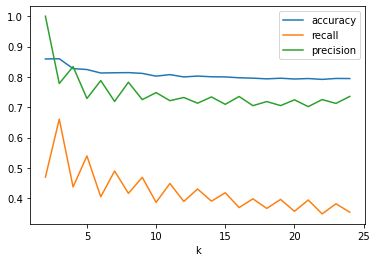

In [112]:
pd.DataFrame(outputs).plot(x='k') #looks like precision bottoms out quickly, but recall doesn't bottom out by 20

In [113]:
outputs = []
for k in range(2, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    metrics_dict = metrics.classification_report(y_validate, y_pred, output_dict=True)
    output= {
        'k': k,
        'accuracy': knn.score(X_validate, y_validate),
        'recall': metrics_dict['1']['recall'],
        'precision':metrics_dict['1']['precision']
    }
    outputs.append(output)

In [114]:
telco_val_df = pd.DataFrame(outputs)
telco_val_df

,k,accuracy,recall,precision
0,2,0.759062,0.278075,0.601156
1,3,0.758351,0.475936,0.552795
2,4,0.781095,0.355615,0.665000
3,5,0.778252,0.470588,0.606897
4,6,0.778962,0.366310,0.649289
5,7,0.786070,0.446524,0.639847
6,8,0.788913,0.368984,0.693467
7,9,0.788202,0.435829,0.652000
8,10,0.783937,0.344920,0.686170
9,11,0.785359,0.393048,0.662162


In [115]:
#use accuracy as a metric
model_compare = pd.DataFrame()
model_compare['k'] = telco_val_df['k']
model_compare['validate_acc'] = telco_val_df['accuracy']
model_compare['train_acc'] = train_telco_df['accuracy']
model_compare['diff'] = abs(model_compare['validate_acc'] - model_compare['train_acc'])
model_compare

,k,validate_acc,train_acc,diff
0,2,0.759062,0.859030,0.099968
1,3,0.758351,0.859792,0.101441
2,4,0.781095,0.827280,0.046185
3,5,0.778252,0.824232,0.045980
4,6,0.778962,0.812802,0.033839
5,7,0.786070,0.813564,0.027494
6,8,0.788913,0.814072,0.025159
7,9,0.788202,0.811532,0.023330
8,10,0.783937,0.802388,0.018450
9,11,0.785359,0.807468,0.022109


<AxesSubplot:xlabel='k'>

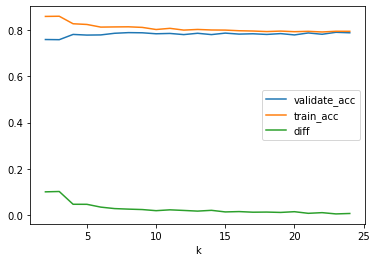

In [116]:
model_compare.plot(x='k')

benefits seem best around k=12, but the higher are more consistent.

## logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression

train, val, test = p.split_titanic_data(a.get_titanic_data())
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
857,1,1,51.0,0,0,26.5500,1,1,0,1
452,0,1,30.0,0,0,27.7500,1,1,0,0
829,1,1,62.0,0,0,80.0000,1,0,0,1
309,1,1,30.0,0,0,56.9292,1,0,0,0
658,0,2,23.0,0,0,13.0000,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
127,1,3,24.0,0,0,7.1417,1,1,0,1
233,1,3,5.0,4,2,31.3875,0,0,0,1
24,0,3,8.0,3,1,21.0750,0,0,0,1
259,1,2,50.0,0,1,26.0000,0,0,0,1


In [118]:
baseline = train.survived.mean()
1 - baseline

0.5939849624060151

1.

Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [119]:
X_train = train[['pclass', 'age', 'fare']]
y_train = train.survived

X_val = val[['pclass', 'age', 'fare']]
y_val = val.survived

In [120]:
logit = LogisticRegression(random_state = 1234)

In [121]:
logit = logit.fit(X_train, y_train)

In [122]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.02587285 -0.03648561  0.00551856]]
Intercept: 
 [2.76721623]


In [123]:
y_pred = logit.predict(X_train)
y_pred[0:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [124]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.49322661, 0.50677339],
       [0.31004366, 0.68995634],
       [0.5198095 , 0.4801905 ],
       [0.27668957, 0.72331043],
       [0.51298636, 0.48701364],
       [0.8125505 , 0.1874495 ],
       [0.83485897, 0.16514103],
       [0.72326635, 0.27673365],
       [0.49689806, 0.50310194],
       [0.35219236, 0.64780764]])

In [125]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,205,32
1,84,78


In [126]:
f"Accuracy of the logistic model: {logit.score(X_train, y_train)}"

'Accuracy of the logistic model: 0.7092731829573935'

In [127]:
pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict = True)).T

,precision,recall,f1-score,support
0,0.709343,0.864979,0.779468,237.000000
1,0.709091,0.481481,0.573529,162.000000
accuracy,0.709273,0.709273,0.709273,0.709273
macro avg,0.709217,0.673230,0.676499,399.000000
weighted avg,0.709240,0.709273,0.695854,399.000000


This is significantly better than baseline on the train data.  Now do val data:

In [128]:
y_pred_val = logit.predict(X_val)

y_pred_val.shape

(143,)

In [129]:
pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_val))

,0,1
0,68,17
1,27,31


In [130]:
f"Accuracy of logit on val data: {logit.score(X_val, y_val)}"

'Accuracy of logit on val data: 0.6923076923076923'

In [131]:
pd.DataFrame(metrics.classification_report(y_val, y_pred_val, output_dict=True)).T

,precision,recall,f1-score,support
0,0.715789,0.800000,0.755556,85.000000
1,0.645833,0.534483,0.584906,58.000000
accuracy,0.692308,0.692308,0.692308,0.692308
macro avg,0.680811,0.667241,0.670231,143.000000
weighted avg,0.687416,0.692308,0.686341,143.000000


Still beating baseline of 0.59

2.

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [132]:
X_train = train[['pclass', 'age', 'fare', 'sex_male']]
y_train = train.survived

X_val = val[['pclass', 'age', 'fare', 'sex_male']]
y_val = val.survived

In [133]:
logit = LogisticRegression(random_state = 1234)

In [134]:
logit = logit.fit(X_train, y_train)

In [135]:
y_pred = logit.predict(X_train)

In [136]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,201,36
1,40,122


In [137]:
f"Accuracy of logit with sex_male: {logit.score(X_train, y_train)}"

'Accuracy of logit with sex_male: 0.8095238095238095'

In [138]:
pd.DataFrame(metrics.classification_report(y_train, y_pred, output_dict= True)).T

,precision,recall,f1-score,support
0,0.834025,0.848101,0.841004,237.000000
1,0.772152,0.753086,0.762500,162.000000
accuracy,0.809524,0.809524,0.809524,0.809524
macro avg,0.803088,0.800594,0.801752,399.000000
weighted avg,0.808904,0.809524,0.809130,399.000000


Better than baseline and the model without gender. Now check with val data

In [139]:
y_pred_val = logit.predict(X_val)

In [140]:
pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_val))

,0,1
0,68,17
1,15,43


In [141]:
f"Accuracy of logit with sex_male on val data: {logit.score(X_val, y_val)}"

'Accuracy of logit with sex_male on val data: 0.7762237762237763'

In [142]:
pd.DataFrame(metrics.classification_report(y_val, y_pred_val, output_dict=True)).T

,precision,recall,f1-score,support
0,0.819277,0.800000,0.809524,85.000000
1,0.716667,0.741379,0.728814,58.000000
accuracy,0.776224,0.776224,0.776224,0.776224
macro avg,0.767972,0.770690,0.769169,143.000000
weighted avg,0.777659,0.776224,0.776788,143.000000


In [143]:
metrics.classification_report(y_val, y_pred_val, output_dict=True)

{'0': {'precision': 0.8192771084337349,
  'recall': 0.8,
  'f1-score': 0.8095238095238095,
  'support': 85},
 '1': {'precision': 0.7166666666666667,
  'recall': 0.7413793103448276,
  'f1-score': 0.728813559322034,
  'support': 58},
 'accuracy': 0.7762237762237763,
 'macro avg': {'precision': 0.7679718875502008,
  'recall': 0.7706896551724138,
  'f1-score': 0.7691686844229217,
  'support': 143},
 'weighted avg': {'precision': 0.7776588872974415,
  'recall': 0.7762237762237763,
  'f1-score': 0.7767881835678446,
  'support': 143}}

Including sex on the model makes it more consistent. This would be expected since sex is correlated with survival (women were more likely to survive).

3.

Try out other combinations of features and models.

In [158]:
import itertools
#get a list of the columns not including survived
x_train_cols = list(train.columns)
x_train_cols = x_train_cols[1:]

list(itertools.permutations(x_train_cols))

[('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'sex_male',
  'embark_town_Queenstown',
  'embark_town_Southampton'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'sex_male',
  'embark_town_Southampton',
  'embark_town_Queenstown'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'embark_town_Queenstown',
  'sex_male',
  'embark_town_Southampton'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'embark_town_Queenstown',
  'embark_town_Southampton',
  'sex_male'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'embark_town_Southampton',
  'sex_male',
  'embark_town_Queenstown'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'alone',
  'embark_town_Southampton',
  'embark_town_Queenstown',
  'sex_male'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'sex_male',
  'alone',
  'embark_town_Queenstown',
  'embark_town_Southampton'),
 ('pclass',
  'age',
  'sibsp',
  'parch',
  'fa

In [153]:
outputs = []
for i in range(1,len(x_train_cols)+1):
    #make train and validate sets
    X_train = train[x_train_cols[:i]]
    y_train = train.survived
    X_val = val[x_train_cols[:i]]
    y_val = val.survived
    #make a model
    logit = LogisticRegression(random_state = 123, max_iter = 1000)
    logit = logit.fit(X_train, y_train)
    y_pred_train = logit.predict(X_train)
    metric_dict_train = metrics.classification_report(y_train, y_pred_train, output_dict=True)
    #check against val
    y_pred_val = logit.predict(X_val)
    metric_dict_val = metrics.classification_report(y_val, y_pred_val, output_dict=True)
    #make output dictionary
    output = {
        'columns_used':x_train_cols[:i],
        'train_accuracy':metric_dict_train['accuracy'],
        'val_accuracy':metric_dict_val['accuracy'],
        'difference':abs(metric_dict_train['accuracy'] - metric_dict_val['accuracy'])
    }
    outputs.append(output)

In [156]:
pd.DataFrame(outputs)

,columns_used,train_accuracy,val_accuracy,difference
0,[pclass],0.679198,0.671329,0.007869
1,"[pclass, age]",0.696742,0.699301,0.002559
2,"[pclass, age, sibsp]",0.684211,0.685315,0.001104
3,"[pclass, age, sibsp, parch]",0.694236,0.678322,0.015914
4,"[pclass, age, sibsp, parch, fare]",0.709273,0.706294,0.002979
5,"[pclass, age, sibsp, parch, fare, alone]",0.736842,0.713287,0.023555
6,"[pclass, age, sibsp, parch, fare, alone, sex_m...",0.802005,0.783217,0.018788
7,"[pclass, age, sibsp, parch, fare, alone, sex_m...",0.799499,0.783217,0.016282
8,"[pclass, age, sibsp, parch, fare, alone, sex_m...",0.802005,0.790210,0.011795


4.

Use you best 3 models to predict and evaluate on your validate sample.